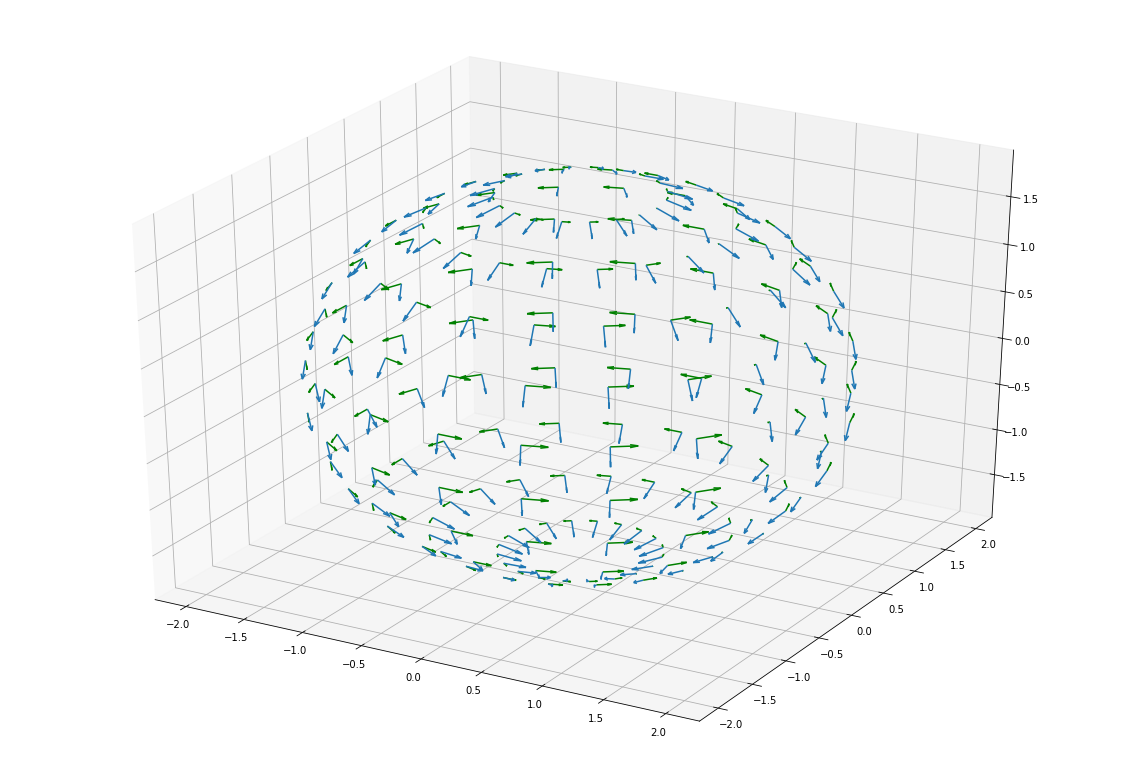

[1.11838581 0.         1.65807515]
[[ 1.636609   -0.        ]
 [ 0.         -0.12223107]
 [-1.10390671 -0.        ]]
[[-0.06936067  0.        ]
 [ 0.          1.4633671 ]]


ValueError: could not broadcast input array from shape (2,3) into shape (10,20,2,2)

In [12]:
from numpy import linalg
import numpy as np


N_colatitude = 10
N_longitude = 20
radius = 2.

positions = np.zeros((N_colatitude, N_longitude, 3))

colatitude = np.linspace(np.pi/N_colatitude, np.pi*(1-1/N_colatitude), N_colatitude, endpoint=True)
longitude = np.linspace(0., 2*np.pi, N_longitude, endpoint=False)

# Define positions of vertices
for i in range(N_colatitude):
    for j in range(N_longitude):
        positions[i,j,0] = radius*np.sin(colatitude[i])*np.cos(longitude[j])
        positions[i,j,1] = radius*np.sin(colatitude[i])*np.sin(longitude[j])
        positions[i,j,2] = radius*np.cos(colatitude[i])

# 2 basis vectors for the 2D surface embedded (immersed?) in 3D
basis = np.zeros((N_colatitude, N_longitude, 2, 3))

# Define basis vectors
for i in range(N_colatitude):
    for j in range(N_longitude):
        if (i>=1 and i<N_colatitude-1):
            temp = positions[i+1,j,:] - positions[i-1,j,:]
            basis[i,j,0,:] = temp/(colatitude[i+1] - colatitude[i-1])
        elif i==0:
            temp = positions[1,j,:] - positions[0,j,:]
            basis[0,j,0,:] = temp/(colatitude[1] - colatitude[0])
        else:
            temp = positions[-1,j,:] - positions[-2,j,:]
            basis[-1,j,0,:] = temp/(colatitude[-1] - colatitude[-2])
            
        #print(str(i)+'\t'+str(j)+'\t'+str((j+1)%N_longitude)+'\t'+str((j-1)%N_longitude))
        temp = positions[i,(j+1)%N_longitude,:] - positions[i,(j-1)%N_longitude,:]
        basis[i,j,1,:] = temp/(longitude[(j+1)%N_longitude] - longitude[(j-1)%N_longitude])


    

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,14))
ax = fig.gca(projection='3d')


ax.quiver(positions[:,:,0], positions[:,:,1], positions[:,:,2], basis[:,:,0,0], basis[:,:,0,1], basis[:,:,0,2], length=0.1)
ax.quiver(positions[:,:,0], positions[:,:,1], positions[:,:,2], basis[:,:,1,0], basis[:,:,1,1], basis[:,:,1,2], length=0.1, color='g')

plt.show()


def left_inverse(matrix):
    matrix_t = np.transpose(matrix)
    metric = np.matmul(matrix_t, matrix)
    inverse_metric = np.linalg.inv(metric)
    return np.matmul(inverse_metric, matrix_t)

christoffel = np.zeros((N_colatitude,N_longitude,2,2,2))

# Define basis vectors
for i in range(N_colatitude):
    for j in range(N_longitude):
        if (i>=1 and i<N_colatitude-1):
            temp = basis[i+1,j,:,:] - basis[i-1,j,:,:]
            # Least squares gives the left inverse of the basis vector matrix,
            # in other words, this calculates the projection into our tangent plane
            gradient = temp/(colatitude[i+1] - colatitude[i-1])
            christoffel[i,j,:,:,0] = np.matmul(left_inverse(np.transpose(basis[i,j,:,:])), \
                                               np.transpose(gradient))
            print(positions[i,j])
            print(np.transpose(basis[i,j,:,:]))
            print(christoffel[i,j,:,:,0])
            temp = basis[i,j+1,:,:] - basis[i,j-1,:,:]
            christoffel[:,:,1] = temp/(longitude[j+1] - longitude[j-1])
        elif i==0:
            temp = positions[1,j,:] - positions[0,j,:]
            basis[0,j,0,:] = temp/(colatitude[1] - colatitude[0])
        else:
            temp = positions[-1,j,:] - positions[-2,j,:]
            basis[-1,j,0,:] = temp/(colatitude[-1] - colatitude[-2])
            
        #print(str(i)+'\t'+str(j)+'\t'+str((j+1)%N_longitude)+'\t'+str((j-1)%N_longitude))
        temp = positions[i,(j+1)%N_longitude,:] - positions[i,(j-1)%N_longitude,:]
        basis[i,j,1,:] = temp/(longitude[(j+1)%N_longitude] - longitude[(j-1)%N_longitude])